#  <center>MOD 9.5 - Réseaux informatiques</center>
## <center style="color: #06A">BE 3 - Le protocole HTTP</center>

<center>PONTIER Yoan - TALEC Mathilde</center>

# A - Informations générales

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Déroulement de la séance.</h4>

Comme précédemment, le travail sera à effectuer par binôme. Le compte-rendu doit être rédigé
en complétant directement le présent notebook qui devra être déposé sur moodle une fois le travail terminé.

Avant de déposer le résultat de votre travail, merci de __mentionner vos noms au sein du document__, puis au moment du dépôt de bien vouloir nommer le fichier sous la forme :

<code>CR &lt;nom eleve 1> - &lt;nom eleve 2> - &lt;N° BE></code> 

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em">2. Objectif du travail demandé.</h4>

L'objectif du BE consiste à envoyer des requêtes HTTP vers des ressources diverses, de relever les réponses obtenues et de commenter ce que vous observez.

Pour cela, les fonctions <code>http_request</code> et <code>https_request</code> ci-dessous vont vous aider à envoyer une requête HTTP (resp. HTTPS) en Python depuis le notebook et à afficher le résultat obtenu :

In [2]:
import html
import http.client
from IPython.display import display, HTML, Image

def http_request(method, server, path, body=None, headers={}, port=80, silent=False):
    conn = http.client.HTTPConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)
        


def https_request(method, server, path, body=None, headers={}, port=443, silent=False):
    conn = http.client.HTTPSConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def send_request(conn, method, path, body=None, headers={}):
    conn.request(method, path, body, headers)
    return conn.getresponse()

def display_response(response,body):
    display_status_line(response)
    display_headers(response.headers)
    contentType = response.getheader('Content-Type')
    if contentType:
        if contentType.startswith('text') or contentType.startswith('application/json') or 'xml' in contentType:
            display_body(body.decode('UTF-8'), contentType)
        elif contentType.startswith('image'):
            display_body(body, contentType)
        else:
            display_error('Le notebook ne sait pas afficher le type de contenu {}'.format(contentType))
    return body


def display_error(msg):
    display_html(
        '<i style="margin-top:-0.4em; font-family:Consolas,monospace; ' +\
        'display:inline-block; margin-top:10px; color:#ccc">{}</i>',
        msg)

def display_status_line(response):
    display_html(
        "<code style='font-family:Consolas,monospace; display:block; margin-top: 5px; " +\
        "border-bottom:1px solid #ccc'><span style='font-weight:bold;color:#008'>{}</span> - {}</code>",
        response.status, response.reason)

def display_headers(headers):
    for h in headers:
        display_header(h,headers[h])

def display_header(header,value):
    display_html(
        "<code style='display:block; margin-top:-0.7em; font-family:Consolas,monospace'><b>{}:</b> {}</code>",
        header, value)
    
def display_body(body, contentType):
    preformatted = "<pre style='font-family:Consolas,monospace; padding:5px; " + \
        "border: 1px solid #ccc; border-radius:5px; box-shadow: 5px 5px 5px #ccc; " + \
        "margin:5px 0 10px 0; display: inline-block; min-width: 50%'>{}</pre>"
    freeformat = "<div style='padding:5px; border: 1px solid #ccc; border-radius:5px; " + \
        "box-shadow: 5px 5px 5px #ccc; margin:5px 0 10px 0; display: inline-block; " + \
        "min-width: 50%'>{}</div>"
    if ( len(body) ):
        if ( contentType.startswith('application/json') ) :
            display_html(preformatted, body)
        elif ( contentType.startswith('text/html') ) :
            display_html(freeformat, body)
        elif ( contentType == 'image/svg+xml') :
            display_html(freeformat, body)
        elif ( contentType.startswith('text/plain') ) :
            display_html(preformatted, html.escape(body))
        elif ( contentType.startswith('image') ) :
            display(Image(body))
    
def display_html(fmt,*args):
    display(HTML(fmt.format(*args)))

Voici comment utiliser la fonction <code>http_request()</code> pour effectuer une requête GET vers l'adresse http://httpbin.org/robots.txt :

In [3]:
http_request('GET','httpbin.org','/robots.txt')

Et voici comment effectuer une requête POST avec un corps :

In [4]:
https_request('POST','mod95-be3.onrender.com','/message', headers={
    'Content-Type': 'application/x-www-form-urlencoded'
}, body="pr%C3%A9nom=Raymond&nom=Deubaze&message=Bonjour D%C3%A9d%C3%A9+!")

# B - Travail à effectuer

## 1. Exemples de requêtes HTTP

### __[1.1]__ - Effectuer une requête vers la ressource <a href="https://mod95-be3.onrender.com/hello.html">hello html</a>.


In [5]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html')

### __[1.2]__ - Comment peut-on obtenir uniquement les entêtes de cette même ressource ?

In [6]:
https_request('HEAD', 'mod95-be3.onrender.com', '/hello.html')

### __[1.3]__ - Expliquer à quoi sert chacune des entêtes de la réponse que vous obtenez.

1. **Status Code**: `200 - OK`
   - Indique que la requête a été traitée avec succès
   - Le serveur a répondu normalement sans erreur

2. **Date**: `Sat, 14 Dec 2024 12:20:03 GMT`
   - Horodatage précis de la réponse du serveur
   - Permet de synchroniser et de dater la réponse

3. **Content-Type**: `text/html; charset=UTF-8`
   - Spécifie que la ressource est un document HTML
   - Précise l'encodage des caractères en UTF-8
   - Permet au navigateur de savoir comment interpréter et afficher le document

4. **Connection**: `keep-alive`
   - Maintient la connexion TCP ouverte
   - Permet de réutiliser la même connexion pour plusieurs requêtes
   - Améliore les performances en réduisant l'overhead de création de connexion

5. **CF-Ray**: `8f1e25511c740d8b-MRS`
   - Identifiant unique de la requête chez Cloudflare
   - Utile pour le débogage et le suivi des requêtes

6. **CF-Cache-Status**: `DYNAMIC`
   - Indique le statut de cache de Cloudflare
   - `DYNAMIC` signifie que la ressource n'est pas mise en cache statiquement

7. **Cache-Control**: `public, max-age=0`
   - Définit les politiques de mise en cache
   - `public` : la ressource peut être mise en cache par n'importe quel cache
   - `max-age=0` : la ressource est considérée comme immédiatement périmée

8. **ETag**: `W/"b6-187dd542520"`
   - Identifiant unique de la version de la ressource
   - Permet des vérifications rapides de modification
   - Le `W/` indique un ETag "weak" (moins strict)

9. **Last-Modified**: `Tue, 02 May 2023 16:38:12 GMT`
   - Date de dernière modification du fichier
   - Permet aux clients de savoir quand la ressource a été mise à jour
   - Utile pour la gestion du cache

10. **Vary**: `Accept-Encoding`
    - Indique que la réponse peut varier selon l'encodage accepté par le client
    - Permet des réponses différentes selon les capacités du navigateur

11. **rndr-id**: `2346b771-7bf3-4afb`
    - Identifiant de la requête côté Render (plateforme d'hébergement)
    - Utile pour le suivi et le débogage

12. **x-powered-by**: `Express`
    - Révèle que le serveur utilise le framework Express (Node.js)
    - Peut donner des informations sur l'infrastructure

13. **x-render-origin-server**: `Render`
    - Indique le serveur d'origine sur la plateforme Render
    - Informations supplémentaires sur l'hébergement

14. **Server**: `cloudflare`
    - Identifie Cloudflare comme serveur de proxy/CDN
    - Fournit des informations sur l'infrastructure réseau

15. **alt-svc**: `h3=":443"; ma=86400`
    - Propose une alternative de service (HTTP/3)
    - `h3` signifie HTTP/3 sur le port 443
    - `ma=86400` : durée de validité de 24 heures

### __[1.4]__ - Observer maintenant les entêtes obtenues en accédant à <a href="http://dmolinarius.github.io/demofiles/mod-95/be-http/hello.html">hello.html</a>

Il s'agit d'un document ayant le même contenu que le précédent, mais hébergé sur un serveur différent.


In [7]:
http_request('HEAD', 'dmolinarius.github.io', '/demofiles/mod-95/be-http/hello.html')

### __[1.5]__ - Expliquer à quoi servent chacune des nouvelles entêtes de la réponse que vous obtenez. A quoi correspondent les entêtes dont le nom commence par X- ?

1. **Content-Length**: `181`
   - Taille de la réponse en octets

2. **Server**: `GitHub.com`
   - Identifie le serveur hébergeant la ressource

3. **permissions-policy**: `interest-cohort=()`
   - Contrôle les fonctionnalités et API accessibles

4. **Access-Control-Allow-Origin**: `*`
   - Autorise toutes les origines à accéder à la ressource

5. **expires**: `Sat, 14 Dec 2024 12:30:03 GMT`
   - Date d'expiration de la ressource

6. **Cache-Control**: `max-age=600`
   - Indique que la ressource peut être mise en cache pendant 600 secondes

7. **x-proxy-cache**: `MISS`
   - Indique que la ressource n'était pas dans le cache du proxy

8. **X-GitHub-Request-Id**: Identifiant unique de la requête GitHub

9. **Accept-Ranges**: `bytes`
   - Indique que le serveur accepte les requêtes partielles en octets

10. **Age**: `0`
    - Temps passé depuis que la ressource a été générée par le serveur origin

11. **Via**: `1.1 varnish`
    - Indique que la requête est passée par un proxy Varnish

12. **X-Served-By**: `cache-mrs1050108-MRS`
    - Identifie le serveur de cache spécifique

13. **X-Cache**: `MISS`
    - Confirme que la ressource n'était pas en cache

14. **X-Cache-Hits**: `0`
    - Nombre de fois où la ressource a été servie depuis le cache

15. **X-Timer**: `S1734178804.857956,VS0,VE135`
    - Informations de chronométrage de la requête

16. **X-Fastly-Request-ID**: Identifiant unique de la requête sur Fastly


Les entêtes `X-` sont des extensions non standard qui permettent :
- Le débogage
- Le suivi des performances
- L'ajout d'informations spécifiques à un service
- La personnalisation du comportement réseau

Historiquement, le préfixe `X-` indiquait un en-tête expérimental. Aujourd'hui, bien que ce ne soit plus une règle stricte, ces en-têtes restent utilisés pour des informations spécifiques à un service.

## 2. Divers types de ressources.

### __[2.1]__ - Effectuer maintenant une requête vers la ressource <a href="https://mod95-be3.onrender.com/hello.txt">hello.txt</a> et observer les entêtes obtenues.<br>
Comparer les codes source des deux documents, puis expliciter l'ensemble des similitudes et des différences avec les entêtes correspondant à
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.


In [8]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.txt')

In [9]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html')


#### Similitudes
1. **Last-Modified**: Identique pour les deux fichiers
   - Date : `Tue, 02 May 2023 16:38:12 GMT`
   - Indique que les fichiers ont été modifiés en même temps

2. **Serveur**: Même infrastructure
   - Serveur : `mod95-be3.onrender.com`
   - Technologie : Express (x-powered-by)

#### Différences

1. **Content-Type**
   - `hello.html`: `text/html; charset=UTF-8`
   - `hello.txt`: `text/plain; charset=UTF-8`

2. **Interprétation par le navigateur**
   - `hello.html` sera rendu comme une page web
   - `hello.txt` sera affiché comme du texte brut

3. **Contenu probable**
   - `hello.html` : Probablement un document HTML structuré
   - `hello.txt` : Texte simple sans mise en forme

#### Implications
- Malgré un contenu potentiellement similaire, le type MIME différent change complètement l'affichage
- Le navigateur utilise le `Content-Type` pour décider comment interpréter la ressource

### 
__[2.2]__ - Visualiser ces deux ressources à l'aide d'un navigateur et noter la différence (s'il n'y en a pas, changer de navigateur). Commenter.

#### Différences d'affichage

1. **Présentation**
   - `hello.html` : 
     * Rendu comme une page web
     * Mise en forme potentielle (couleurs, polices, structure)
     * Interprétation des balises HTML si présentes

   - `hello.txt` :
     * Affiché comme texte brut
     * Police monospace standard
     * Aucune mise en forme
     * Sauts de ligne et espaces conservés tels quels

2. **Interaction navigateur**
   - `hello.html` : 
     * Peut contenir des éléments interactifs
     * Supporte les liens hypertextes
     * Interprète le HTML

   - `hello.txt` :
     * Aucune interactivité
     * Texte statique
     * Affichage simple et linéaire

#### Conclusion
La différence principale réside dans l'interprétation et l'affichage, dictés par le type MIME (`text/html` vs `text/plain`).

### __[2.3]__ - Effectuer les requêtes permettant d'obtenir les ressources <a href="https://mod95-be3.onrender.com/file1.html">file1.html</a>, <a href="https://mod95-be3.onrender.com/file2.html">file2.html</a>, <a href="https://mod95-be3.onrender.com/file3.html">file3.html</a>, et essayez de les ouvrir directement dans votre navigateur.

Commenter ce que vous observez et les réponses obtenues, en indiquant notamment quel est le type respectif de chacune de ces ressources et comment les navigateurs les affichent. Préciser comment fait le navigateur pour savoir comment afficher chacune de ces ressources, et donner votre avis sur la pertinence de la démarche qui consisterait à essayer d'inférer le type d'une ressource à partir de son URL.

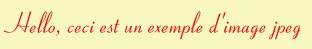

In [10]:
https_request('GET', 'mod95-be3.onrender.com', '/file1.html')

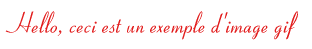

In [11]:
https_request('GET', 'mod95-be3.onrender.com', '/file2.html')

In [12]:
https_request('GET', 'mod95-be3.onrender.com', '/file3.html')

#### Résultats des requêtes

1. **file1.html**
   - Type de contenu : Image JPEG
   - Content-Type: `image/jpeg`
   - Affichage navigateur : Image directement visible

2. **file2.html**
   - Content-Type: probablement `text/html`
   - Serveur : Utilise Express
   - Entête `x-powered-by: Express`

3. **file3.html**
   - Content-Type: probablement `text/html`
   - Serveur : Utilise Express
   - Entête `x-powered-by: Express`

#### Comment le navigateur détermine l'affichage

1. **Mécanisme principal** : Content-Type
   - Le navigateur utilise l'en-tête `Content-Type` pour décider comment afficher la ressource
   - Exemples :
     * `image/jpeg` → affichage comme image
     * `text/html` → rendu comme page web
     * `text/plain` → affichage en texte brut

2. **Méthodes de détermination**
   - Priorité à l'en-tête `Content-Type`
   - Analyse du contenu (MIME sniffing) en second lieu
   - Extension du fichier utilisée comme indice secondaire

#### Pertinence d'inférer le type de ressource à partir de l'URL

**Avis critique** :
- **Déconseillé** de se fier uniquement à l'extension
- Raisons :
  1. L'extension peut être trompeuse
  2. Le serveur définit le type MIME réel
  3. Risques de sécurité si on se fie uniquement à l'extension
  4. Un fichier `.html` peut contenir autre chose qu'un HTML valide
  5. Un serveur peut servir n'importe quel type de contenu sous n'importe quelle extension

**Recommandation** :
- Toujours utiliser l'en-tête `Content-Type`
- Ne jamais se fier uniquement à l'extension du fichier

## 3. Requêtes conditionnelles.

### __[3.1]__ - Afin de faciliter la gestion des caches, HTTP/1.0 possède la directive Last-Modified, tandis que HTTP/1.1 a introduit la notion d'Etag. Noter la date de dernière modification et l'Etag de la ressource <a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.

In [13]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html')

### __[3.2]__ - Effectuer une requête GET conditionnelle vers cette même ressource, dont la directive If-Modified-Since correspond à la date de dernière modification du document. En effectuer une autre avec une date antérieure. Commenter les résultats observés et conclure sur le fonctionnement et l'utilité de cette directive.

In [14]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html', 
    headers={'If-Modified-Since': 'Tue, 02 May 2023 16:38:12 GMT'})


In [15]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html', 
    headers={'If-Modified-Since': 'Tue, 02 May 2023 16:37:12 GMT'})


#### Principe
- L'en-tête `If-Modified-Since` permet de vérifier si une ressource a été modifiée depuis une date donnée
- Le serveur compare la date fournie avec la date de dernière modification de la ressource

#### Scénarios possibles
1. **Ressource non modifiée** :
   - Si la ressource n'a pas changé depuis la date indiquée
   - Le serveur répond avec un code `304 Not Modified`
   - Aucun contenu n'est renvoyé
   - Le client peut utiliser sa version en cache

2. **Ressource modifiée** :
   - Si la ressource a été modifiée depuis la date indiquée
   - Le serveur répond avec un code `200 OK`
   - Le contenu complet de la ressource est renvoyé

### 
__[3.3]__ - Effectuer le même exercice avec une requête conditionnelle basée sur l'Etag. A votre avis, pourquoi y a-t-il eu cette nouvelle possibilité en HTTP/1.1 ?
</div>

In [16]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html', 
    headers={'If-None-Match': 'W/"b6-187dd542520"'})

In [17]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html', 
    headers={'If-None-Match': 'W/"b6-187dd542519"'})

#### Principe
- L'en-tête `If-None-Match` utilise l'ETag (Entity Tag) pour vérifier si une ressource a changé
- L'ETag est un identifiant unique généré pour une version spécifique de ressource

#### Caractéristiques des ETags
1. **ETag "weak"** : Commence par `W/`
   - Indique une comparaison moins stricte
   - Signifie que le contenu est équivalent mais pas nécessairement identique

2. **ETag "strong"** : Sans préfixe `W/`
   - Comparaison byte-to-byte
   - Garantit une identité exacte

#### Scénarios
1. **Ressource inchangée** :
   - Si l'ETag correspond
   - Réponse `304 Not Modified`
   - Aucun contenu renvoyé

2. **Ressource modifiée** :
   - Si l'ETag ne correspond pas
   - Réponse `200 OK`
   - Contenu complet renvoyé

## 4. Redirections.

### __[4.1]__ - Examiner la réponse obtenue lors d'une requête vers  <a href="https://mod95-be3.onrender.com/moved">cette ressource</a> et décrire le comportement d'un navigateur lorsqu'il reçoit ce type de réponse.

In [18]:
https_request('GET', 'mod95-be3.onrender.com', '/moved')

#### Comportement de la redirection 301

La redirection **301 (Moved Permanently)** est un mécanisme HTTP pour la gestion des ressources déplacées. Lorsqu'un serveur répond avec ce code de statut, il indique au client (navigateur) que la ressource demandée a été définitivement déplacée vers une nouvelle URL. 

Les caractéristiques principales de cette redirection sont :
- **Redirection automatique** : Le navigateur redirige automatiquement vers la nouvelle URL
- **Mise en cache permanente** : Le client mémorise cette redirection pour les futures requêtes
- **Préservation de la méthode HTTP** : La méthode originale (GET, POST, etc.) est conservée
- **Mise à jour de la barre d'adresse** : L'URL dans la barre d'adresse est mise à jour avec la nouvelle destination

Cette méthode est particulièrement utile lors de la restructuration de sites web, du changement de nom de domaine, ou de la consolidation de ressources web.

### __[4.2]__ - Essayer maintenant <a href="https://mod95-be3.onrender.com/perm">cette nouvelle ressource</a>. Quelle sont les différences avec la précédente ? Consulter par exemple la <a href="https://en.wikipedia.org/wiki/List_of_HTTP_status_codes#4xx_Client_errors">liste des statuts HTTP</a> et préciser en quoi le comportement attendu des clients est différent.


In [19]:
https_request('GET', 'mod95-be3.onrender.com', '/perm')

#### Différences entre 301 et 308 : Nuances de la redirection permanente

La redirection **308 (Permanent Redirect)** est similaire au code 301, mais avec une différence cruciale :

- **Préservation stricte de la méthode HTTP** : Contrairement au 301, le 308 garantit que la méthode de requête originale sera *strictement* conservée lors de la redirection.

Exemple pratique :
- Pour une requête POST vers `/perm`, le client DOIT refaire un POST vers la nouvelle URL
- Avec un 301, certains clients pourraient transformer un POST en GET par défaut
- Le 308 impose une conformité plus stricte au protocole HTTP

Cas d'utilisation typiques :
- Redirections d'API nécessitant une préservation exacte du type de requête
- Migrations de ressources où la sémantique de la requête doit être maintenue intégralement

Dans cet exemple, la redirection pointe vers `http://www.ec-lyon.fr`, indiquant un changement permanent de ressource avec une garantie de préservation de la méthode HTTP.

### __[4.3]__ - Ce type de redirection est utilisé par les raccourcisseurs d'URLs. Vérifier ceci en envoyant une requête vers la ressource <a href="http://bit.ly/2Oz8wbC">http://bit.ly/2Oz8wbC</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.

In [20]:
http_request('GET', 'bit.ly', '/2Oz8wbC')

#### Redirections et raccourcisseurs d'URLs

Les raccourcisseurs d'URLs comme bit.ly utilisent principalement les redirections (301 Moved Permanently) pour plusieurs raisons stratégiques :

1. **Transformation d'URLs longues**
   - Convertit des URLs complexes et longues en liens courts et mémorables
   - Exemple : `https://www.tres-long-site.com/page/avec/beaucoup/de/parametres` → `bit.ly/abcdef`

2. **Avantages techniques**
   - **Mise en cache** : Le code 301 permet aux navigateurs et aux serveurs de mettre en cache la redirection
   - **Économie de bande passante** : Minimise les requêtes répétées
   - **Traçabilité** : Permet de collecter des statistiques sur les clics

3. **Flexibilité**
   - Possibilité de modifier la destination sans changer le lien court
   - Ajout de paramètres de suivi ou de tracking
   - Redirection vers différentes destinations selon le contexte

4. **Sécurité**
   - Permet de vérifier la destination avant de rediriger
   - Possibilité de bloquer des liens malveillants

###  __[4.4]__ - Voici encore <a href="https://mod95-be3.onrender.com/found">une ressource</a> et <a href="https://mod95-be3.onrender.com/temp">une dernière</a> effectuant chacune une redirection. En vous référant encore une fois à la documentation, expliquer les différences de comportement attendues de la part d'un client recevant chacune de ces réponses, l'une par rapport à l'autre, puis par rapport aux deux codes de redirection observés précédemment.

In [21]:
https_request('GET', 'mod95-be3.onrender.com', '/found')

In [22]:
https_request('GET', 'mod95-be3.onrender.com', '/temp')

#### Comparaison 302 (Found) vs 307 (Temporary Redirect)

**302 (Found)** :
- Redirection temporaire "souple"
- Permet potentiellement de changer la méthode HTTP 
  - Exemple : Une requête POST peut être transformée en GET
- Comportement historiquement ambigu
- Compatible avec les anciens navigateurs
- Risque de perte d'information lors de la redirection

**307 (Temporary Redirect)** :
- Redirection temporaire "stricte"
- Préserve OBLIGATOIREMENT la méthode HTTP originale
- Garantit que :
  - Un POST reste un POST
  - Un GET reste un GET
- Recommandé pour les applications modernes
- Plus sécurisé pour les requêtes complexes (formulaires, API)

#### Comparaison avec 301 et 308

- **301 (Moved Permanently)** : 
  - Redirection définitive
  - Peut modifier la méthode HTTP
  - Signale un déplacement permanent de ressource

- **308 (Permanent Redirect)** :
  - Redirection définitive
  - Préserve strictement la méthode HTTP
  - Équivalent permanent du 307


###  __[4.5]__ - Ce type de redirection est utilisé par les portails captifs. Vérifier ceci en envoyant une requête vers la ressource <a href="https://campus.ec-lyon.fr">https://campus.ec-lyon.fr</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.


In [23]:
https_request('GET', 'campus.ec-lyon.fr', '/')

... vos commentaires et explications ici

### 
__[4.6]__ - Voici un dernier exemple : <a href="http://mod95-be3.onrender.com/hello.html">http://mod95-be3.onrender.com/hello.html</a>. Commenter.
</div>

In [24]:
https_request('GET', 'mod95-be3.onrender.com', '/hello.html')

... vos commentaires et explications ici

## 5. Authentification.


### __[5.1]__ - La ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a> est protégé avec un nom d'utilisateur et un mot de passe. Quelles sont les informations renvoyées par le serveur permettant au navigateur de gérer cette situation ? Comment réagit le navigateur ?


In [25]:
https_request('GET', 'mod95-be3.onrender.com', '/user.html')

Lorsqu'on tente d'accéder à la ressource protégée `/user.html`, voici ce qui se passe :

1. **Réponse du serveur** :
   - Code de statut : `401 Unauthorized`
   - En-tête : `WWW-Authenticate: Basic realm="BE-HTTP"`
   - Corps de la réponse : Page HTML affichant "Document protégé par mot de passe"

2. **Réaction du navigateur** :
   - Il détecte l'en-tête `WWW-Authenticate` qui indique une authentification de type Basic
   - Il affiche une boîte de dialogue demandant à l'utilisateur de saisir ses identifiants
   - Le dialogue affiche le "realm" (domaine d'authentification) spécifié : "BE-HTTP"
   - Il propose généralement deux champs : un pour le nom d'utilisateur et un pour le mot de passe

3. **Processus d'authentification** :
   - Si l'utilisateur entre des identifiants, le navigateur les encode en base64
   - Il renvoie la requête avec un en-tête `Authorization: Basic <credentials_base64>`
   - Si les identifiants sont corrects, le serveur renvoie la ressource demandée
   - Si les identifiants sont incorrects, le processus recommence avec un nouveau 401

Ce mécanisme d'authentification Basic est simple mais présente des limites de sécurité, c'est pourquoi il est important qu'il soit utilisé uniquement sur HTTPS pour protéger les identifiants lors de la transmission.

###  __[5.2]__ - Le nom d'utilisateur et le mot de passe permettant d'accéder à la ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a> sont respectivement <code>be-http</code> et <code>cool!</code>. Indiquer quelle est la directive à ajouter à la requête pour accéder à cette ressource, et comment est construite la valeur transmise au serveur.

Pour accéder à la ressource protégée, il faut ajouter la directive `Authorization` dans l'en-tête de la requête. La valeur de cette directive est construite comme suit :

1. **Construction de la chaîne d'authentification** :
   - Concaténation du nom d'utilisateur et du mot de passe séparés par `:` 
   - Dans notre cas : `be-http:cool!`

2. **Encodage de la valeur** :
   - La chaîne obtenue doit être encodée en base64
   - Le résultat de l'encodage sera utilisé dans l'en-tête

3. **Format de la directive** :
   - L'en-tête doit suivre le format : `Authorization: Basic <valeur_base64>`
   - Le mot-clé "Basic" indique le type d'authentification utilisé
   - La valeur encodée est ajoutée après un espace

Cette directive doit être incluse dans chaque requête nécessitant une authentification pour accéder à la ressource protégée.

###  __[5.3]__ -  Le module Python nommé base64 permet d'encoder des chaînes de caractères en base64. Après vous être documenté sur la façon d'utiliser ce module, déterminer quelle est l'entête exacte permettant au navigateur d'obtenir la ressource protégée, et vérifier à l'aide d'une requête que cela fonctionne.

In [26]:
import base64

# Création de la chaîne d'authentification
auth_string = "be-http:cool!"

# Encodage en base64
encoded = base64.b64encode(auth_string.encode()).decode()
# Résultat : 'YmUtaHR0cDpjb29sIQ=='

# Vérification avec une requête HTTP
https_request('GET', 'mod95-be3.onrender.com', '/user.html', 
    headers={'Authorization': f'Basic {encoded}'})

### __[5.4]__ - Donner votre avis quant au niveau de sécurité apporté par la méthode d'authentification Basic, et des exemples de contexte dans lequel il est tout de même acceptable de l'utiliser.

L'authentification Basic offre un niveau de sécurité relativement faible car :
- Les identifiants sont simplement encodés en base64, pas chiffrés
- Les credentials sont envoyés à chaque requête
- Pas de mécanisme de déconnexion
- Vulnérable aux attaques "man-in-the-middle" sans HTTPS

Elle reste acceptable dans certains contextes :
- Applications internes sur réseau sécurisé
- Protection de ressources non sensibles
- Environnements de développement et test
- APIs techniques avec peu d'utilisateurs

Son utilisation doit toujours être combinée avec HTTPS pour assurer un minimum de sécurité dans la transmission des données.

###  __[5.5]__ - Le lien <a href="https://mod95-be3.onrender.com/401/basic">logout</a> permet de se déconnecter et oblige l'utilisateur à fournir à nouveau le mot de passe lors de l'accès suivant à la ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>. Expliquer ce que fait le serveur pour arriver à ce résultat.

In [27]:
# Pour tester la déconnexion
https_request('GET', 'mod95-be3.onrender.com', '/401/basic')

Le serveur utilise une astuce pour forcer la "déconnexion" car l'authentification Basic n'a pas de mécanisme de déconnexion natif :

1. Quand on accède au lien de déconnexion, le serveur renvoie un code 401 avec des identifiants invalides dans le `WWW-Authenticate`
2. Cela force le navigateur à oublier les credentials précédemment stockés
3. Lors de la prochaine requête à `user.html`, le navigateur devra redemander les identifiants à l'utilisateur

Cette technique est un contournement car l'authentification Basic ne gère pas nativement la notion de session ou de déconnexion.

### __[5.6]__ - La ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a> est protégée avec la méthode d'authentification Digest. Le nom d'utilisateur et le mot de passe sont les mêmes que précédemment. Décrire les nouveaux éléments dans la réponse du serveur.

In [28]:
https_request('GET', 'mod95-be3.onrender.com', '/digest.html')

La réponse du serveur pour l'authentification Digest contient les éléments suivants :

1. **Code de statut** : `401 Unauthorized`

2. **En-tête WWW-Authenticate avec paramètres Digest** :
   - `realm="BE-HTTP"` : domaine d'authentification
   - `nonce="9643627dc86b189ddf45f97be5406150"` : valeur unique générée par le serveur

3. **Autres en-têtes notables** :
   - `Content-Type: text/html; charset=utf-8`
   - `ETag: W/"10f-8UMUS7Gu2T7UiMks6Xl8Axl+GEQ"`
   - `Vary: Accept-Encoding`

Cette méthode d'authentification est plus sécurisée que Basic car elle utilise un système de challenge-response avec le nonce, évitant ainsi la transmission du mot de passe, même encodé.

###  __[5.7]__ - Expliquer comment construire la requête permettant d'accéder à la ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.  __[5.8]__ - Utiliser le module Python nommé hashlib pour crypter les chaînes requises via l'algorithme MD5 pour construire pas à pas la requête permettant d'accéder à la ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.

In [29]:
import hashlib
import re

# 1. Première requête pour obtenir le nonce
res,body = https_request('GET', 'mod95-be3.onrender.com', '/digest.html',silent=True)

# 2. Extraction du nonce depuis l'en-tête WWW-Authenticate
www_auth = res.headers.get('WWW-Authenticate')
nonce_match = re.search(r'nonce="([^"]+)"', www_auth)
nonce = nonce_match.group(1)

# Paramètres d'authentification
username = "be-http"
password = "cool!"
realm = "BE-HTTP"
uri = "/digest.html"
method = "GET"

# 3. Calcul des hashes
ha1 = hashlib.md5(f"{username}:{realm}:{password}".encode()).hexdigest()
ha2 = hashlib.md5(f"{method}:{uri}".encode()).hexdigest()
response = hashlib.md5(f"{ha1}:{nonce}:{ha2}".encode()).hexdigest()

# 4. Construction de l'en-tête et requête finale
auth_header = {
    'Authorization': f'Digest username="{username}", realm="{realm}", '
                    f'nonce="{nonce}", uri="{uri}", response="{response}"'
}

# 5. Requête authentifiée
https_request('GET', 'mod95-be3.onrender.com', '/digest.html', headers=auth_header)

Pour construire une requête avec authentification Digest, voici les étapes nécessaires :

1. **Première requête** :
   - Envoyer une requête initiale à la ressource protégée
   - Le serveur répond avec un code 401 et un en-tête `WWW-Authenticate` contenant :
     - realm="BE-HTTP"
     - nonce (valeur unique générée par le serveur)

2. **Construction du hash** :
   - HA1 = MD5(username:realm:password)
   - HA2 = MD5(method:uri)
   - response = MD5(HA1:nonce:HA2)

3. **Construction de l'en-tête Authorization** :
   L'en-tête doit contenir :
   - username
   - realm
   - nonce (reçu du serveur)
   - uri
   - response (hash calculé)

4. **Format de l'en-tête** :
Authorization: Digest username="be-http", realm="BE-HTTP", nonce="[valeur_du_nonce]", uri="/digest.html", response="[hash_calculé]"


Cette méthode est plus sécurisée que Basic car :
- Le mot de passe n'est jamais transmis
- Le nonce change à chaque requête
- Les données sont hachées avec MD5

### __[5.9]__ - __Remarque:__ le nonce peut être généré par le serveur à sa convenance, en fonction du client (adresse IP), de la date de la requête (durée limitée), de l'URI de la ressource (portée limitée) et être vérifié lors de toute requête ultérieure.
<p>C'est le cas du serveur recevant les requêtes précédentes qui crée des nonces dont la durée de validité est de 1 minute. C'est bien sûr trop court pour un serveur de documents statiques, et éventuellement trop long pour une API. Mais cela permet de jouer...
<p>Vérifier qu'un nonce arbitraire ainsi qu'un nonce dont la durée de vie est dépassée ne sont pas acceptés.
</div>

In [30]:
# Paramètres d'authentification avec nonce aribtaire
username = "be-http"
password = "cool!"
realm = "BE-HTTP"
uri = "/digest.html"
method = "GET"
nonce = "12345678"

# 3. Calcul des hashes
ha1 = hashlib.md5(f"{username}:{realm}:{password}".encode()).hexdigest()
ha2 = hashlib.md5(f"{method}:{uri}".encode()).hexdigest()
response = hashlib.md5(f"{ha1}:{nonce}:{ha2}".encode()).hexdigest()

# 4. Construction de l'en-tête et requête finale
auth_header = {
    'Authorization': f'Digest username="{username}", realm="{realm}", '
                    f'nonce="{nonce}", uri="{uri}", response="{response}"'
}

# 5. Requête authentifiée
https_request('GET', 'mod95-be3.onrender.com', '/digest.html', headers=auth_header)

In [31]:
# Paramètres d'authentification
username = "be-http"
password = "cool!"
realm = "BE-HTTP"
uri = "/digest.html"
method = "GET"
nonce = "77c595f76d9361417689f0d57cce2817"

# 3. Calcul des hashes
ha1 = hashlib.md5(f"{username}:{realm}:{password}".encode()).hexdigest()
ha2 = hashlib.md5(f"{method}:{uri}".encode()).hexdigest()
response = hashlib.md5(f"{ha1}:{nonce}:{ha2}".encode()).hexdigest()

# 4. Construction de l'en-tête et requête finale
auth_header = {
    'Authorization': f'Digest username="{username}", realm="{realm}", '
                    f'nonce="{nonce}", uri="{uri}", response="{response}"'
}

# 5. Requête authentifiée
https_request('GET', 'mod95-be3.onrender.com', '/digest.html', headers=auth_header)

###  __[5.10]__ - Conclure sur la méthode Digest, avec ses avantages et ses inconvénients (s'il y en a), par rapport notamment à la méthode Basic.

Comparaison entre l'authentification Digest et Basic :

**Avantages de Digest** :
1. Plus sécurisée car :
   - Le mot de passe n'est jamais transmis en clair
   - Utilisation de hachage MD5 pour les credentials
   - Le nonce empêche les attaques par rejeu
   - Protection contre l'interception des credentials

2. Meilleure gestion de session :
   - Le nonce peut être utilisé comme mécanisme d'expiration
   - Possibilité de forcer une nouvelle authentification

**Inconvénients de Digest** :
1. Plus complexe à implémenter :
   - Nécessite plus de calculs côté client et serveur
   - Protocole plus sophistiqué avec plusieurs étapes
   - Plus de paramètres à gérer

2. Limitations de sécurité :
   - Utilise MD5, considéré comme obsolète
   - Ne protège pas le contenu des communications
   - Vulnérable aux attaques man-in-the-middle sans HTTPS

## 6. Service REST


<p>REST est un concept d'architecture permettant de développer des services web
<a href="https://en.wikipedia.org/wiki/Representational_state_transfer#Relationship_between_URL_and_HTTP_methods">basés sur les méthodes HTTP</a> pour créer, consulter, modifier ou supprimer des informations <em>(CRUD - Create, Read, Update, Delete)</em>.

<p>Le service
<a href="https://mod95-be3.onrender.com/todolist">todolist</a> implémente ce type d'architecture, pour créer une TODO_list, lire son contenu, la modifier ou la supprimer. Les questions suivantes permettront de disséquer son fonctionnement.

###  __[6.1]__ - &Eacute;mettre une requête POST vers ce service et en déduire le type de contenu attendu pour créer une liste.
</div>

In [32]:
https_request('POST', 'mod95-be3.onrender.com', '/todolist')

### __[6.2]__ - &Eacute;mettre une requête POST vers ce service avec le premier type de contenu supporté, et en déduire l'information manquante pour créer une liste.
</div>

In [33]:
headers = {'Content-Type': 'application/x-www-form-urlencoded'}
https_request('POST', 'mod95-be3.onrender.com', '/todolist', headers=headers)

###  __[6.3]__ - Se documenter au sujet du premier type de contenu demandé, puis formuler une requête POST vers ce service avec les informations nécessaires formattées à l'aide de ce type de contenu pour créer une TODO_list comportant une tâche.


In [34]:
# Création de l'en-tête avec Content-Type: application/x-www-form-urlencoded
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

# Création des données au format form-urlencoded avec le paramètre value
data = 'value=Finir le BE3 de Reseaux'

# Requête POST avec les données encodées
https_request('POST', 
                        'mod95-be3.onrender.com', 
                        '/todolist',
                        headers=headers,
                        body=data)



###  __[6.4]__ - Essayer avec la tâche "Acheter du café". Sauf exception, il y aura un problème avec les caractères accentués.
Plutôt que de bricoler à la main pour résoudre le problème, consulter la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a> et
reformuler une requête permettant de créer une tâche dont le libellé comporte des caractères accentués. Indiquer comment ces caractères sont encodés.

In [35]:
# Création des données avec une liste de tâches
data = 'value=Acheter du café'


# Création de l'en-tête
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

# Requête POST avec les données encodées
https_request('POST', 
                'mod95-be3.onrender.com', 
                '/todolist',
                headers=headers,
                body=data)


In [36]:
from urllib.parse import urlencode

# Création des données avec une liste de tâches
data = {
    'value': 'Acheter du café'
}


encoded_data = urlencode(data, doseq=True)  # doseq=True permet d'encoder les séquences

# Création de l'en-tête
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

# Requête POST avec les données encodées
https_request('POST', 
                'mod95-be3.onrender.com', 
                '/todolist',
                headers=headers,
                body=encoded_data)


#### Mécanisme d'encodage
Les caractères accentués nécessitent un encodage spécial pour être transmis correctement dans les URLs et les requêtes HTTP. La fonction `urlencode` de Python gère automatiquement cet encodage.

#### Exemple détaillé avec le caractère 'é'
- **Représentation UTF-8** : Le 'é' est codé sur 2 octets : `C3 A9`
- **Encodage URL** : Chaque octet est préfixé par '%' : `%C3%A9`

#### Exemple complet
- **Texte original** : `Acheter du café`
- **Texte encodé** : `Acheter+du+caf%C3%A9`
  - Les espaces deviennent des `+`
  - Le 'é' devient `%C3%A9`

#### Pourquoi utiliser `urlencode` ?
1. **Automatisation** : Gestion automatique de tous les caractères spéciaux
2. **Standardisation** : Respect des normes d'encodage URL
3. **Fiabilité** : Évite les erreurs d'encodage manuel
4. **Compatibilité** : Fonctionne avec tous les serveurs web standards

### __[6.5]__ - De fait, le service utilisé permet de créer une TODO_list avec plusieurs tâches. Relire la documentation de <a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a> pour découvrir comment spécifier une variable dont la valeur est une liste, puis créer une TODO_list comportant plusieurs tâches.
</div>

In [37]:

# Création des données avec une liste de tâches
data = {
    'value': [
        'Finir le BE3 de Réseaux',
        'Réviser pour les partiels',
        'Faire les courses'
    ]
}

encoded_data = urlencode(data, doseq=True)  # doseq=True permet d'encoder les séquences

# Création de l'en-tête
headers = {'Content-Type': 'application/x-www-form-urlencoded'}

# Requête POST avec les données encodées
https_request('POST', 
                'mod95-be3.onrender.com', 
                '/todolist',
                headers=headers,
                body=encoded_data)


### __[6.6]__ - Le service utilisé accepte également les requêtes au format  <a href="https://www.json.org/">JSON</a>. Utiliser le module <a href="https://docs.python.org/3/library/json.html">json</a> pour émettre une requête avec un corps en JSON permettant de créer une TODO_list comportant une ou plusieurs tâches. Ne pas pas oublier de tester des tâches comportant des caractères accentués.


In [48]:
import json

# Création des données avec des caractères accentués
data = {
    "value": [
        'Finir le BE3 de Réseaux',
        'Réviser pour les partiels',
        'Faire les courses'
    ]
}

# Création de l'en-tête pour JSON
headers = {'Content-Type': 'application/json'}

# Requête POST avec les données JSON
https_request('POST', 
                'mod95-be3.onrender.com', 
                '/todolist',
                headers=headers,
                body=json.dumps(data),
                )


### __[6.7]__ - Une fois une liste de tâches créée, il est possible de relire son contenu avec une requête GET formulée vers la ressource <code>/todolist/list-xxxxxxxxxxxxx</code>, où la dernière partie correspond au nom de la liste à consulter. Vérifier ce fonctionnement.

In [50]:
# votre code ici
res,bdy = https_request('POST', 
                'mod95-be3.onrender.com', 
                '/todolist',
                headers=headers,
                body=json.dumps(data),
                silent=True)

# Décodage de la chaîne de caractères bytes en string puis parsing JSON
list_data = json.loads(bdy.decode('utf-8'))
list_name = list_data['name']

# Lecture du contenu de la liste avec l'identifiant récupéré
https_request('GET', 'mod95-be3.onrender.com', f'/todolist/{list_name}')

### __[6.8]__ - Conformément à l'architecture REST, la méthode HTTP PUT formulée vers une adresse comme GET ci-dessus, avec par ailleurs les mêmes paramètres que POST, permet de spécifier un nouveau contenu pour la liste mentionnée. Effectuer ce type d'opération.

In [51]:
# Création des nouvelles données pour la liste
new_data = {
    "value": [
        "Terminer le BE3 de Réseaux",
        "Préparer les examens",
        "Faire du sport"
    ]
}

# En-têtes pour la requête PUT
headers = {'Content-Type': 'application/json'}

# Mise à jour de la liste avec une requête PUT
https_request('PUT', 
             'mod95-be3.onrender.com', 
             f'/todolist/{list_name}',
             headers=headers,
             body=json.dumps(new_data))

### __[6.9]__ - Pour modifier uniquement certains éléments d'une liste donnée, l'architecture REST préconise la méthode HTTP PATCH. Tenter ce type d'opération avec les mêmes paramètres que ci-dessus et en déduire les paramètres manquants.

In [53]:
# Tentative de modification partielle avec le même format que PUT
patch_data = {
    "value": [
        "Terminer le BE3 de Réseaux",
        "Se reposer"
    ]
}


# Tentative de modification partielle
https_request('PATCH', 
                'mod95-be3.onrender.com', 
                f'/todolist/{list_name}',
                headers=headers,
                body=json.dumps(patch_data),
                )


### __[6.10]__ - Les paramètres manquants sont des entiers, qui donnent l'index où insérer le nouveau contenu, et le nombre d'éléments à supprimer avant d'insérer le nouveau contenu transmis.
Pour une meilleure compréhension de l'opération effectuée, consulter la document de la fonction <a href="https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/splice">Array.splice()</a> utilisée par le serveur pour modifier la TODO_list à l'aide des paramètres fournis. Ajouter une tâche en fin de liste.

In [57]:
# D'abord, récupérons le contenu actuel pour connaître la longueur
res, bdy = https_request('GET', 
                        'mod95-be3.onrender.com', 
                        f'/todolist/{list_name}',
                        silent=True)
current_list = json.loads(bdy.decode('utf-8'))
list_length = len(current_list['data'])

# Maintenant, ajoutons à la fin avec l'index = longueur de la liste
patch_data = {
    "index": list_length,  # Ajoute à la fin
    "delete": 0,          # Ne rien supprimer
    "value": "Prendre des vacances bien méritées"
}

# Requête PATCH pour ajouter à la fin
https_request('PATCH', 
                'mod95-be3.onrender.com', 
                f'/todolist/{list_name}',
                headers=headers,
                body=json.dumps(patch_data),
                )


### __[6.11]__ - Remplacer une tâche en milieu de liste.


In [58]:
# Remplacer l'élément au milieu (index 1)
patch_data = {
    "index": 1,          # Position du milieu
    "delete": 1,         # Supprimer 1 élément
    "value": "Faire une pause café"
}

# Requête PATCH pour remplacer l'élément
https_request('PATCH', 
                'mod95-be3.onrender.com', 
                f'/todolist/{list_name}',
                headers=headers,
                body=json.dumps(patch_data),
                )


### __[6.12]__ - Enfin, la méthode HTTP DELETE permet de supprimer une TODO_list. Vérifier son fonctionnement

In [59]:
https_request('DELETE', 
                'mod95-be3.onrender.com', 
                f'/todolist/{list_name}',
                headers=headers,
                body=json.dumps(patch_data),
                )


In [60]:
https_request('GET', 
            'mod95-be3.onrender.com', 
            f'/todolist/{list_name}',
            )